#### Aluna: Camilla Balliana 

In [1]:
import pandas as pd
import numpy as np, zeros, array, copy
import matplotlib.pyplot as plt
from math import*
from pylab import plot,show
%matplotlib inline

ModuleNotFoundError: No module named 'zeros'

## Questão 1

$$
\frac{V_2-V_0}{R} + \frac{V_2-V_4}{R} + \frac{V_2-V_1}{R} = 0
$$
$$
-V_1 + 3V_2 + 0V_3 - V_4 = 0
$$
$$
\frac{V_3-V_4}{R} + \frac{V_3-V_1}{R} + \frac{V_3-V_+}{R} = 0
$$
$$
-V_1 + 0V_2 + 3V_3 - V_4 = V_+
$$
$$
\frac{V_4-V_0}{R} + \frac{V_4-V_1}{R} + \frac{V_4-V_3}{R} + \frac{V_4-V_2}{R}= 0
$$
$$
-V_1 - 0V_2 - V_3 + 4V_4 = 0
$$

In [3]:
#b)
A = np.array([[4, -1, -1, -1], [-1, 3, 0, -1],[-1, 0, 3, -1],[-1, -1, -1, 4]], float)
v = np.array([5, 0, 5, 0], float)
N = len(v)
x = np.zeros(N)

In [4]:
for i in range(N):
    print(A)
    v[i] = v[i]/A[i,i]
    A[i,:] = A[i,:]/A[i,i]
    
    for j in range(i+1,N):
        mult = -(A[j,i])
        A[j,:] = A[j,:] + mult*A[i,:]
        v[j] = v[j] + mult*v[i]
print(A)
print(v)

for i in range(N-1,-1,-1): # Fase da substituição retrocedida
    x[i] = v[i]
    for j in range(i+1,N):
        x[i] -= A[i,j]*x[j] 

[[ 4. -1. -1. -1.]
 [-1.  3.  0. -1.]
 [-1.  0.  3. -1.]
 [-1. -1. -1.  4.]]
[[ 1.   -0.25 -0.25 -0.25]
 [ 0.    2.75 -0.25 -1.25]
 [ 0.   -0.25  2.75 -1.25]
 [ 0.   -1.25 -1.25  3.75]]
[[ 1.         -0.25       -0.25       -0.25      ]
 [ 0.          1.         -0.09090909 -0.45454545]
 [ 0.          0.          2.72727273 -1.36363636]
 [ 0.          0.         -1.36363636  3.18181818]]
[[ 1.         -0.25       -0.25       -0.25      ]
 [ 0.          1.         -0.09090909 -0.45454545]
 [ 0.          0.          1.         -0.5       ]
 [ 0.          0.          0.          2.5       ]]
[[ 1.         -0.25       -0.25       -0.25      ]
 [ 0.          1.         -0.09090909 -0.45454545]
 [ 0.          0.          1.         -0.5       ]
 [ 0.          0.          0.          1.        ]]
[1.25       0.45454545 2.33333333 2.        ]


In [12]:
#c)
xl = np.linalg.solve(A,v)
print(f"Solução método da eliminação de gauss {x}.")
print(f"Método utilizando o linalg {xl}.")

Solução método da eliminação de gauss [3.         1.66666667 3.33333333 2.        ].
Método linalg [3.         1.66666667 3.33333333 2.        ].


## Questão 2

In [14]:
A = np.array([[2, 1, 4, 1],[3, 4, -1, -1],[1, -4, 1, 5],[2, -2, 1, 3]], float) #primeira matriz
v = np.array([-4, 3, 9, 7], float) #solução da primeira matriz
N = len(v)
x = np.zeros(N)

for i in range(N):
    print(A)
    v[i] = v[i]/A[i,i]
    A[i,:] = A[i,:]/A[i,i]
    
    for j in range(i+1,N):
        mult = -(A[j,i])
        A[j,:] = A[j,:] + mult*A[i,:]
        v[j] = v[j] + mult*v[i]
print(A)
print(v)

for i in range(N-1,-1,-1):
    x[i] = v[i]
    for j in range(i+1,N):
        x[i] -= A[i,j]*x[j] 

print(f"A solução será: {x}")

[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
[[ 1.   0.5  2.   0.5]
 [ 0.   2.5 -7.  -2.5]
 [ 0.  -4.5 -1.   4.5]
 [ 0.  -3.  -3.   2. ]]
[[  1.    0.5   2.    0.5]
 [  0.    1.   -2.8  -1. ]
 [  0.    0.  -13.6   0. ]
 [  0.    0.  -11.4  -1. ]]
[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [ 0.   0.   0.  -1. ]]
[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]]
[-2.   3.6 -2.   1. ]
A solução será: [ 2. -1. -2.  1.]


In [19]:
#segundo sistema
M = np.array([[0, 1, 4, 1],[3, 4, -1, -1],[1, -4, 1, 5],[2, -2, 1, 3]], float)
v = np.array([-4, 3, 9, 7], float)
N = len(v)
x = np.zeros(N)

for i in range(N):
    print(A)
    if(A[i,i]==0):
        
        temp2 = 0
        for q in range(N):
            if(temp2<abs(A[q,i])):
                temp2 = A[q, i]
                t = q
        for j in range(N):        
            temp=A[t,j]    
            A[t, j] = A[i, j]
            A[i,j] = temp
        
        temp = v[i]
        v[i]=v[t]
        v[t] = temp
        print(A)
        
    v[i] = v[i]/A[i,i]
    A[i,:] = A[i,:]/A[i,i]
        
        
    for j in range(i+1,N):
        mult = -(A[j,i])
        A[j,:] = A[j,:] + mult*A[i,:]
        v[j] = v[j] + mult*v[i]
print(A)
print(v)

for i in range(N-1,-1,-1):
    x[i] = v[i]
    for j in range(i+1,N):
        x[i] -= M[i,j]*x[j]

x1 = np.linalg.solve(A,v)
print(f"A solução é: {x}")
print(f"A segunda solução é: {x1}")

[[ 1.          1.33333333 -0.33333333 -0.33333333]
 [ 0.          1.          4.          1.        ]
 [ 0.          0.          1.          0.47058824]
 [ 0.          0.          0.          1.        ]]
[[ 1.          1.33333333 -0.33333333 -0.33333333]
 [ 0.          1.          4.          1.        ]
 [ 0.          0.          1.          0.47058824]
 [ 0.          0.          0.          1.        ]]
[[ 1.          1.33333333 -0.33333333 -0.33333333]
 [ 0.          1.          4.          1.        ]
 [ 0.          0.          1.          0.47058824]
 [ 0.          0.          0.          1.        ]]
[[ 1.          1.33333333 -0.33333333 -0.33333333]
 [ 0.          1.          4.          1.        ]
 [ 0.          0.          1.          0.47058824]
 [ 0.          0.          0.          1.        ]]
[[ 1.          1.33333333 -0.33333333 -0.33333333]
 [ 0.          1.          4.          1.        ]
 [ 0.          0.          1.          0.47058824]
 [ 0.          0.          

## Questão 3

In [50]:
#a)

A = np.array([[2, 1, 4, 1],[3, 4, -1, -1],[1, -4, 1, 5],[2, -2, 1, 3]], float) #matriz A
v = np.array([-4, 3, 9, 7])

N = len(A)
L = np.zeros((N,N))
cont = 0
    
for i in range(N):
    print(A)
    for j in range(cont,N):
        L[j][i] = A[j][i]
            
    A[i,:] = A[i,:]/A[i,i]

    for j in range(i+1,N):
        mult = -(A[j,i])
        A[j,:] = A[j,:] + mult*A[i,:]
            
    cont = cont + 1
U = A

Z = np.zeros((N,N))
    
for i in range(N):
    for j in range(N):
        temp = 0
        for k in range(N):
                temp = temp +  L[i][k]*U[k][j]
                Z[i][j] = temp

print(f"As matrizes L e U são, respectivamente:")
print(f"\n{L}\n")
print(U)

[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
[[ 1.   0.5  2.   0.5]
 [ 0.   2.5 -7.  -2.5]
 [ 0.  -4.5 -1.   4.5]
 [ 0.  -3.  -3.   2. ]]
[[  1.    0.5   2.    0.5]
 [  0.    1.   -2.8  -1. ]
 [  0.    0.  -13.6   0. ]
 [  0.    0.  -11.4  -1. ]]
[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [ 0.   0.   0.  -1. ]]
As matrizes L e U são, respectivamente:

[[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]]

[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]]


In [51]:
#b)
v = np.array([-4, 3, 9, 7])
y = np.zeros(N)

for k in range(N):
    y[k] = v[k]/L[k][k]
    for q in range(k-1, -1, -1):
        y[k] = y[k] - (L[k][q]*y[q])/L[k][k]
y

x = np.zeros(N)
for k in range(N-1, -1, -1):
    x[k] = y[k]
    for q in range(k+1, N):
        x[k] = x[k] - M[k][q]*x[q]
x

sx = np.linalg.solve(L,v)
sy = np.linalg.solve(M, y)
print(f"As soluções serão: {sx} \n e {sx} ")

As soluções serão: [-2.   3.6 -2.   1. ] 
 e [-2.   3.6 -2.   1. ] 


## Questão 4

As voltagens serão V_1 = [3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ] V
As voltagens serão V_2 = [3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ] V
As voltagens serão V_3 = [3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ] V
As voltagens serão V_4 = [3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ] V
As voltagens serão V_5 = [3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ] V
As voltagens serão V_6 = [3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ] V


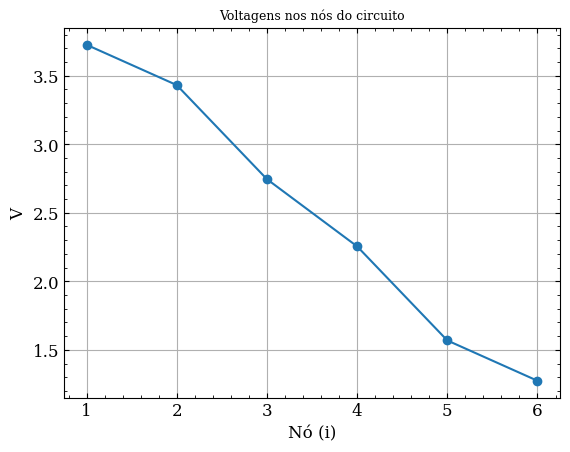

In [42]:
#a)
A = array([[3, -1, -1, 0, 0, 0],[-1, 4, -1, -1, 0, 0],[-1, -1, 4, -1, -1, 0],[0, -1, -1, 4, -1, -1],[0, 0, -1, -1, 4, -1], [0, 0, 0, -1, -1, 3]],float)
v = array([5,5,0,0,0,0], float)
N = len(v)
x = zeros(N)

for i in range(N):
    for k in range(i+1,N):
        if abs(A[k,i]) > abs(A[i,i]):
            vet = copy(A[k,:])
            A[k,:]=A[i,:]
            A[i,:]=vet
            a = v[i]
            v[i]=v[k]
            v[k]=a
    v[i] = v[i]/A[i,i]
    A[i,:] = A[i,:]/A[i,i]
    for j in range(i+1,N):
        mult = -(A[j,i])
        A[j,:] = A[j,:] + mult*A[i,:]
        v[j] = v[j] + mult*v[i]
for i in range(N-1,-1,-1):
    x[i] = v[i]
    for j in range(i+1,N):
        x[i] -= A[i,j]*x[j]
        
for i in range(N):
    print(f"As voltagens serão V_{i+1} = {x} V")
    
plt.plot(range(1, N+1), x, 'o-')
plt.xlabel('Nó (i)')
plt.ylabel('V')
plt.title('Voltagens nos nós do circuito', size = 9)
plt.grid(True)
plt.show()

In [43]:
#b)
def resistores_val(N, V_):
    A = np.zeros((N, N))
    w = np.zeros(N)

    
    for i in range(N):
        if i == 0:
            A[i, i] = 3
            A[i, i+1] = -1
            A[i, i+2] = -1
            w[i] = V_
        elif i == 1:
            A[i, i-1] = -1
            A[i, i] = 4
            A[i, i+1] = -1
            A[i, i+2] = -1
            w[i] = V_
        elif i == N-1:
            A[i, i-2] = -1
            A[i, i-1] = -1
            A[i, i] = 3
        elif i == N-2:
            A[i, i-2] = -1
            A[i, i-1] = -1
            A[i, i] = 4
            A[i, i+1] = -1
        else:
            A[i, i-2] = -1
            A[i, i-1] = -1
            A[i, i] = 4
            A[i, i+1] = -1
            A[i, i+2] = -1

    x = np.linalg.solve(A, w)

    return x

N = 6 

resistores = resistores_val(N, 5)

print("As voltagens nas junções são:")
for i, x in enumerate(resistores, start=1):
    print(f"V_{i} = {x:.2f} V")

As voltagens nas junções são:
V_1 = 3.73 V
V_2 = 3.43 V
V_3 = 2.75 V
V_4 = 2.25 V
V_5 = 1.57 V
V_6 = 1.27 V


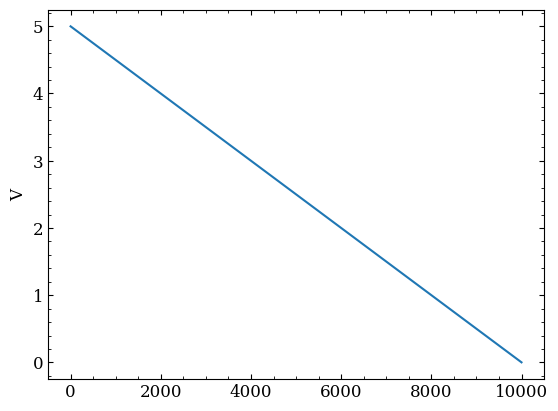

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [ 3.  4.  4. ...  4.  4.  3.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
As voltagens serão:[4.99888228e+00 4.99861842e+00 4.99802841e+00 ... 1.97158611e-03
 1.38158071e-03 1.11772227e-03]


In [35]:
#c)
N = 10000

A = np.zeros([5, N], float)
for i in range(N):
    A[0, i] = -1
    A[1, i] = -1
    A[2, i] = 4
    A[3, i] = -1
    A[4, i] = -1

A[2, 0] = 3
A[2, N - 1] = 3

v = np.zeros(N, float)
v[0], v[1] = 5, 5

x = banded(A, v, 2, 2)

plt.plot(x)
plt.ylabel('V')
plt.show()

print(A)
print(f"As voltagens serão:{x}")